# Sample using Github Event Data for Analysis

In [19]:
import pandas as pd
from fidap import fidap_client
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
fidap = fidap_client(db='sf', api_key="b8a8ebb5f4cf4983a4fa63be6ca418c2")

# Github Event Questions

## How many PR's were made in the current month of February?

In [11]:
count_prs = fidap.sql("""select count(*) as number_of_prs from "FIDAP_DATA_SOURCES"."FIDAP_SCHEMA"."github" where "type" = 'PullRequestEvent'""")
print(f'There were {count_prs.values[0][0]} made in this month so far.')

There were 3308118 made in this month so far.


## Which Users Made the most PR's this month (excluding bots or users with bot in their names)?

In [22]:
users_prs = fidap.sql("""select count(*) as number_of_prs, "username" from "FIDAP_DATA_SOURCES"."FIDAP_SCHEMA"."github" where "type" = 'PullRequestEvent' and "username" not like '%bot%' group by "username" order by number_of_prs desc;""")

### Table of Top 5 Users

In [32]:
users_prs.head(5)

,number_of_prs,username
0,38611,direwolf-github
1,15209,satyanutella1
2,8816,satyanutella2
3,5300,chrisbarnatt
4,4661,mindustrykilla


### WordCloud of Top 50 Users

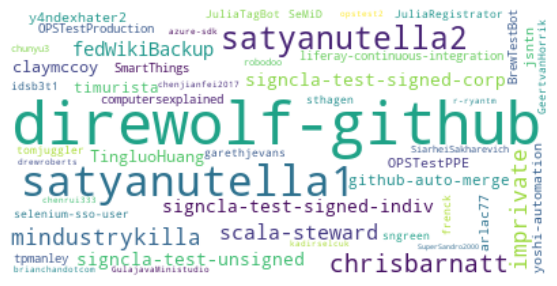

In [33]:
values = {}
for count, user in users_prs.values:
    values[user] = count
wordcloud = WordCloud(max_font_size=100, max_words=50, background_color="white")
wordcloud.generate_from_frequencies(frequencies=values)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()